## Imports

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.cluster_enrichment_analysis import analyze_cluster_deviations

### Import Functions

In [11]:
from src.K_Means_optimisation_GenePy import KM_RF, merge_phen_genepy
from src.Agglomerative_clustering_optimisation import AggC_opt, AggC
from src.cluster_enrichment_analysis import analyze_cluster_deviations
from src.Plotting import AggC_dend, plotk

### Import SPARC IBD CADD15 GenePy Matrix

In [3]:
#Import SPARC IBD CADD15 GenePy matrix
SPARC_IBD_CADD15_GenePy = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/IBD Data/IBD Plexus/ibdplexus202407_ccds_CADD15_merged.mmScaled.matrix")

#Set samid as index
SPARC_IBD_CADD15_GenePy = SPARC_IBD_CADD15_GenePy.set_index("samid")

### Import Gene Lists

In [4]:
NOD_sig_genes9 = pd.read_table("C:/Users/fvl1g23/OneDrive - University of Southampton/PhD/Projects/ML/Gene lists/NOD_sig_genes9.txt")

## SPARC IBD

### 9 NOD Signalling Genes

In [5]:
results_df = AggC_opt(SPARC_IBD_CADD15_GenePy, NOD_sig_genes9, cohort_name='SPARC')

In [6]:
results_df

,n_clusters,silhouette_score,DBI_score,max_cluster_size
0,2,0.441782,0.842869,2559
1,3,0.480969,1.595245,2396
2,4,0.497713,1.176812,2396
3,5,0.397264,1.162770,2034
4,6,0.408313,0.823911,2034
5,7,0.430790,0.765561,2006
6,8,0.454780,0.733916,1967
7,9,0.456820,0.794291,1464
8,10,0.453464,0.722089,1464
9,11,0.472334,0.699673,1464


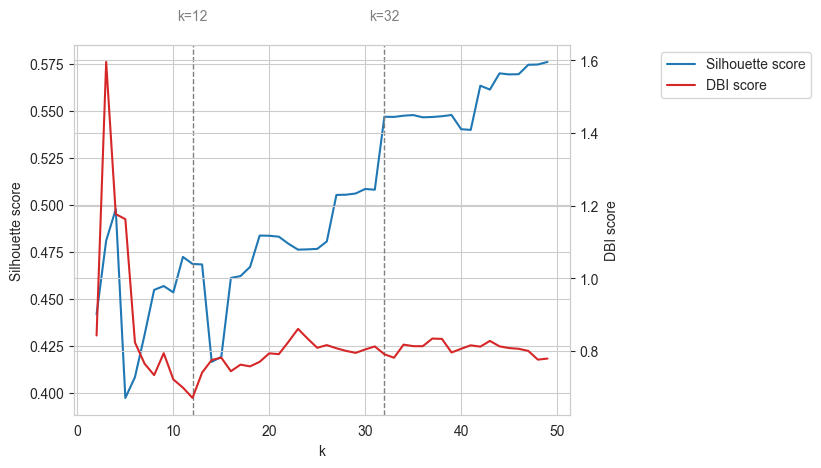

In [7]:
plotk(results_df, [12, 32])

In [14]:
#12 clusters
aggc_out, X, linkage_matrix = AggC(SPARC_IBD_CADD15_GenePy, NOD_sig_genes9, n_cluster=32)

In [15]:
aggc_out_phen_GenePy = merge_phen_genepy(aggc_out, SPARC_IBD_CADD15_GenePy, X)

In [16]:
results_df = analyze_cluster_deviations(aggc_out_phen_GenePy, ['Diagnosis', 'Crohn s disease phenotype', 'IBD surgery final'])
print(results_df['Diagnosis']['overall_p_value'])
print(results_df['Crohn s disease phenotype']['overall_p_value'])
print(results_df['IBD surgery final']['overall_p_value'])

2.305157943690298e-13
1.2115745497858302e-06
6.162165926090665e-05


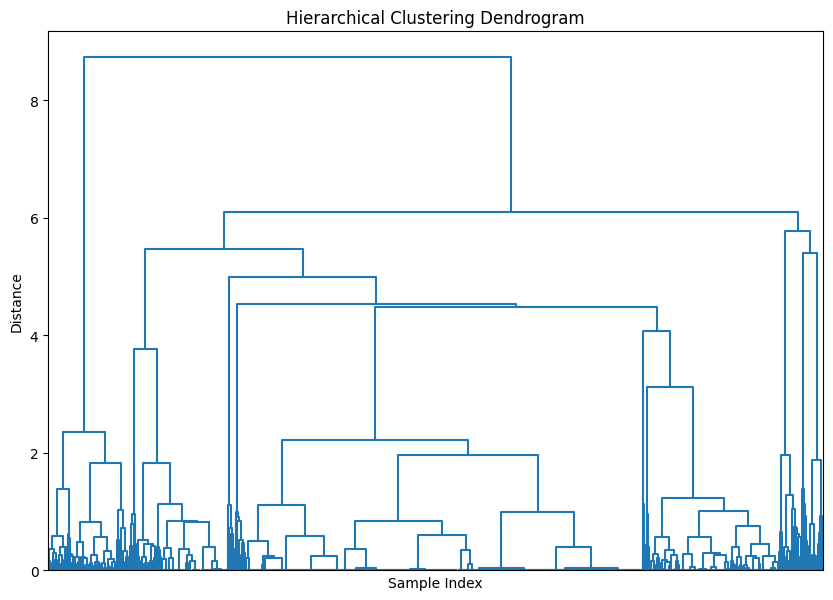

In [24]:
AggC_dend(linkage_matrix, no_labels=True)